---

## **📊 Using SQL to Determine Insights**

In this section, we're **connecting our cleaned Spotify streaming history dataset to PostgreSQL** using SQLAlchemy, allowing us to efficiently run SQL queries within Jupyter Notebook.

### **🛠️ Steps in this Process:**

- 1) **Importing Required Libraries**  
   - `sqlalchemy` for managing database connections.  
   - `pandas` for handling structured data.  
   - `os` and `dotenv` to securely retrieve database credentials from a `.env` file.  
   - `matplotlib` and `seaborn` for visualization.  

- 2) **Loading Environment Variables**  
   - Using `load_dotenv()` to **securely access** database credentials stored in a hidden `.env` file.

- 3) **Setting Up SQL Connection**  
   - Constructing a **SQLAlchemy connection string** dynamically using credentials from the `.env` file.
   - Connecting to PostgreSQL using `create_engine(db_url)`, allowing for seamless interaction between Python and SQL.

- 4) **Preparing for Data Analysis & Visualization**  
   - Setting the visualization theme with `seaborn` to enhance readability for upcoming data plots.

### **Next Steps:**
With this connection established, we can now **run SQL queries** directly from Python, retrieve insights, and visualize trends in the Spotify listening history. 

---


In [1]:
from sqlalchemy import create_engine
import pandas as pd
import os
from dotenv import load_dotenv

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load environment variables
load_dotenv()

True

In [4]:
# Set visualization theme
sns.set_theme(style="darkgrid")

In [5]:
# Create the SQLAlchemy connection string
db_url = f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"

In [6]:
# Connect using SQLAlchemy
engine = create_engine(db_url)

# **Top 10 Most Played Songs:**

In [7]:
# Query the database and load the data into a DataFrame
# Read the query into a DataFrame using SQLAlchemy
# Visualization - Top 10 Most Played Songs by Total Playtime

In [8]:
query_top_songs = """
SELECT 
    master_metadata_track_name AS track, 
    master_metadata_album_artist_name AS artist, 
    COUNT(*) AS play_count  -- Counting occurrences of the song being played
FROM spotify_history_2020
WHERE master_metadata_track_name IS NOT NULL 
GROUP BY track, artist
ORDER BY play_count DESC
LIMIT 10;
"""

In [9]:
df_top_songs = pd.read_sql(query_top_songs, engine)

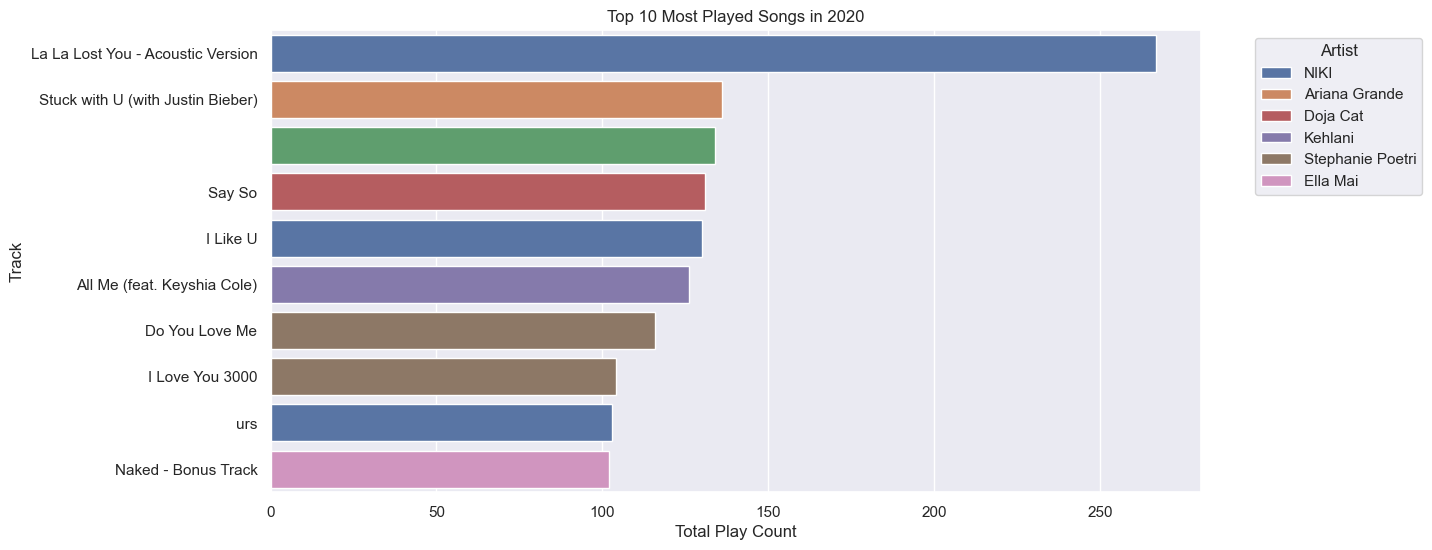

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_songs["play_count"], y=df_top_songs["track"], hue=df_top_songs["artist"], dodge=False)
plt.xlabel("Total Play Count")
plt.ylabel("Track")
plt.title("Top 10 Most Played Songs in 2020")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

---

# **Peak Listening Hours**

In [11]:
query_peak_hours = """
SELECT EXTRACT(HOUR FROM ts) AS hour, COUNT(*) AS play_count
FROM spotify_history_2020
GROUP BY hour
ORDER BY hour;
"""

In [12]:
df_peak_hours = pd.read_sql(query_peak_hours, engine)

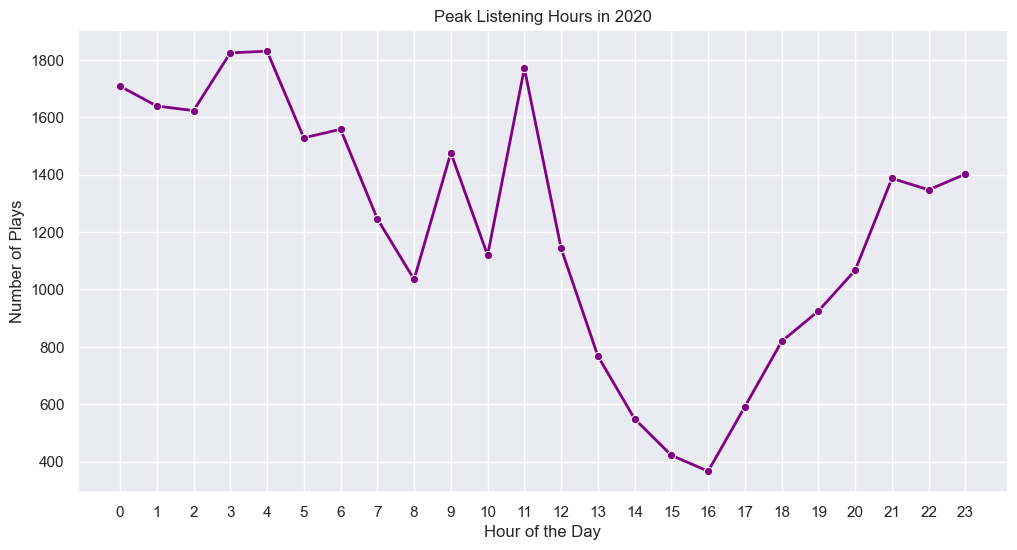

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_peak_hours["hour"], y=df_peak_hours["play_count"], marker="o", linewidth=2, color="purple")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Plays")
plt.title("Peak Listening Hours in 2020")
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [14]:
query_peak_hours = """
SELECT 
    CASE 
        WHEN EXTRACT(HOUR FROM ts) BETWEEN 0 AND 5 THEN 'Late Night (12AM-5AM)'
        WHEN EXTRACT(HOUR FROM ts) BETWEEN 6 AND 11 THEN 'Morning (6AM-11AM)'
        WHEN EXTRACT(HOUR FROM ts) BETWEEN 12 AND 17 THEN 'Afternoon (12PM-5PM)'
        ELSE 'Evening (6PM-11PM)'
    END AS time_period,
    COUNT(*) AS play_count
FROM public.spotify_history_2020
GROUP BY time_period
ORDER BY play_count DESC;
"""

In [15]:
df_peak_hours = pd.read_sql(query_peak_hours, engine)

C:\Users\kcalo\AppData\Local\Temp\ipykernel_40780\1572911919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_peak_hours["time_period"], y=df_peak_hours["play_count"], palette="viridis")


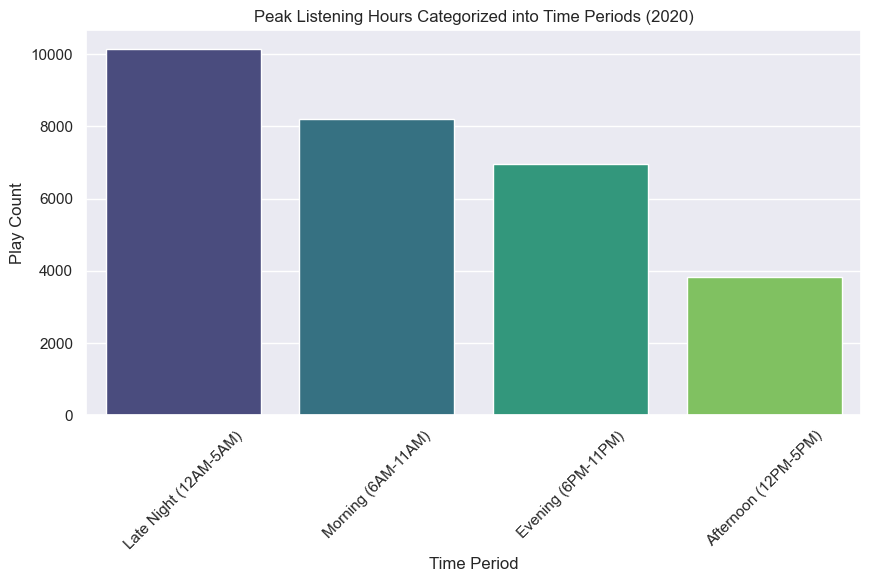

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_peak_hours["time_period"], y=df_peak_hours["play_count"], palette="viridis")

plt.xlabel("Time Period")
plt.ylabel("Play Count")
plt.title("Peak Listening Hours Categorized into Time Periods (2020)")
plt.xticks(rotation=45) 
plt.show()

---

# **Top 10 Artists**

In [17]:
query_top_artists = """
SELECT master_metadata_album_artist_name AS artist, 
       COUNT(*) AS play_count
FROM spotify_history_2020
GROUP BY artist
ORDER BY play_count DESC
LIMIT 10;
"""

In [18]:
df_top_artists = pd.read_sql(query_top_artists, engine)

C:\Users\kcalo\AppData\Local\Temp\ipykernel_40780\4209953795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top_artists["play_count"], y=df_top_artists["artist"], hue=None, palette="rocket")


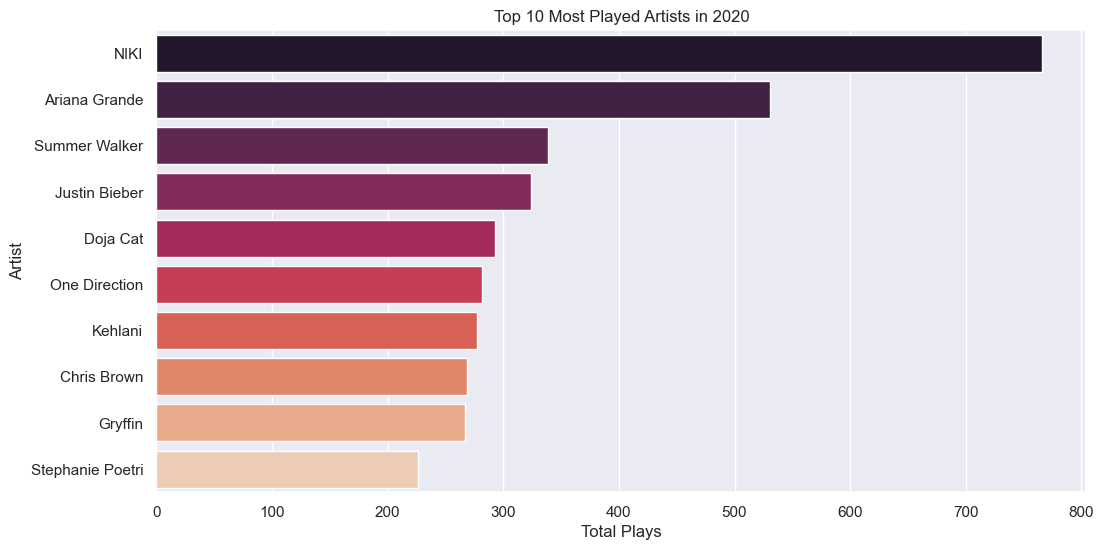

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_artists["play_count"], y=df_top_artists["artist"], hue=None, palette="rocket")
plt.xlabel("Total Plays")
plt.ylabel("Artist")
plt.title("Top 10 Most Played Artists in 2020")
plt.show()

# **Top 10 Albums**

In [20]:
query_top_albums = """
SELECT master_metadata_album_album_name AS album, 
       master_metadata_album_artist_name AS artist,
       COUNT(*) AS play_count
FROM spotify_history_2020
GROUP BY album, artist
ORDER BY play_count DESC
LIMIT 10;
"""

In [21]:
df_top_albums = pd.read_sql(query_top_albums, engine)

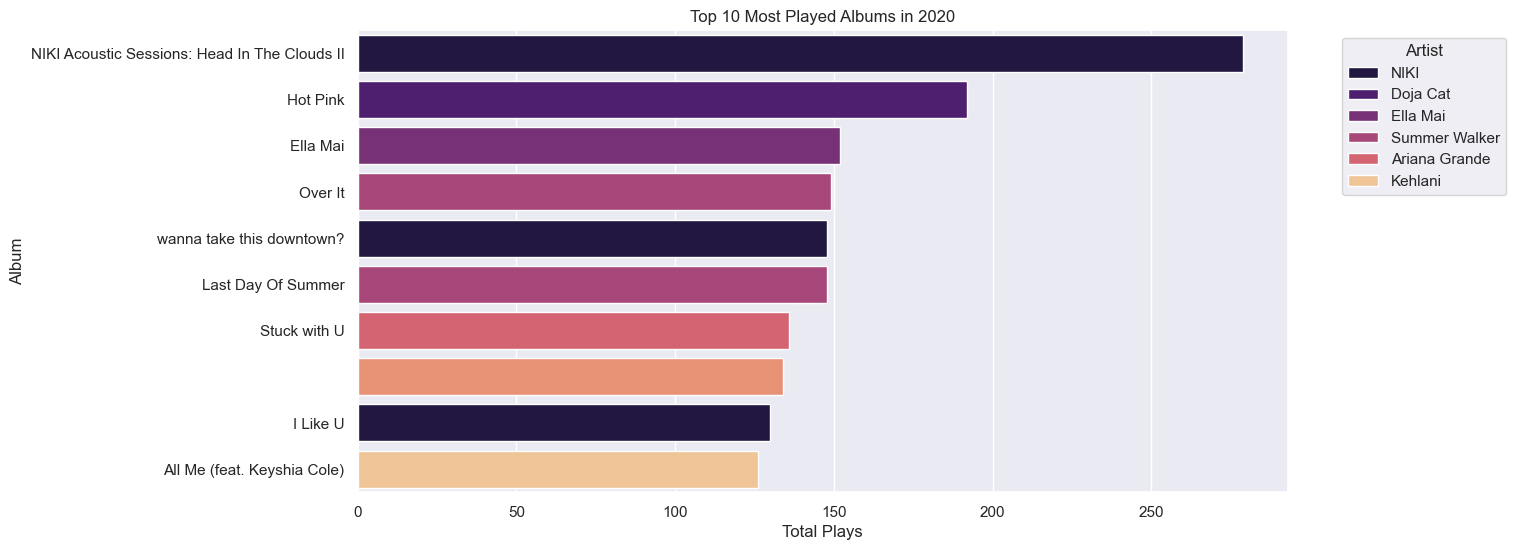

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_albums["play_count"], y=df_top_albums["album"], hue=df_top_albums["artist"], dodge=False, palette="magma")
plt.xlabel("Total Plays")
plt.ylabel("Album")
plt.title("Top 10 Most Played Albums in 2020")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

---

# **Most Active Listening Days**

In [23]:
query_listening_days = """
SELECT TO_CHAR(ts, 'Day') AS day_of_week, COUNT(*) AS play_count
FROM spotify_history_2020
GROUP BY day_of_week
ORDER BY play_count DESC;
"""

In [24]:
df_listening_days = pd.read_sql(query_listening_days, engine)

C:\Users\kcalo\AppData\Local\Temp\ipykernel_40780\850598178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_listening_days["day_of_week"], y=df_listening_days["play_count"], palette="coolwarm")


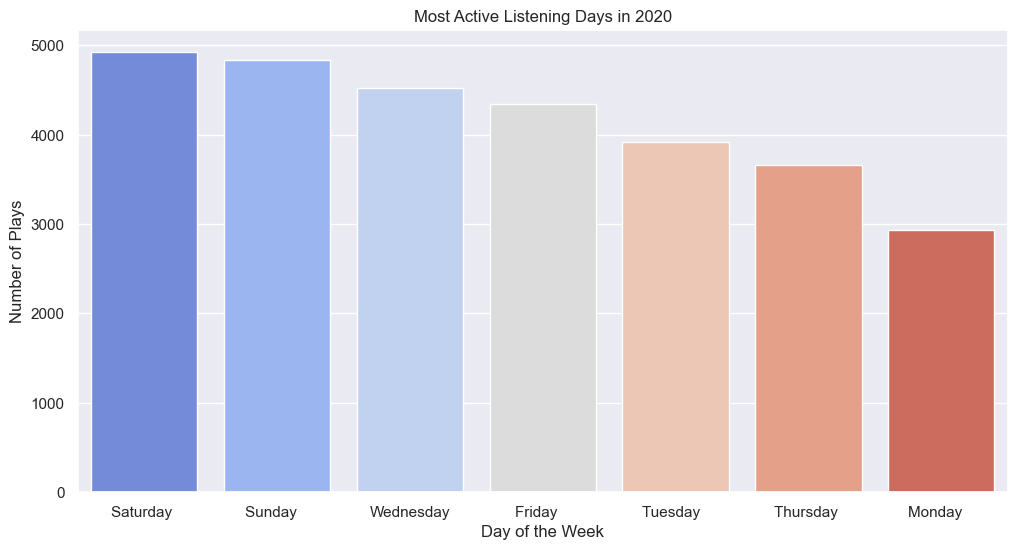

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_listening_days["day_of_week"], y=df_listening_days["play_count"], palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Plays")
plt.title("Most Active Listening Days in 2020")
plt.show()

---

# **Weekend vs. Weekday Listening**

In [26]:
query_weekend_vs_weekday = """
SELECT CASE 
        WHEN EXTRACT(DOW FROM ts) IN (0, 6) THEN 'Weekend'
        ELSE 'Weekday'
       END AS day_type,
       COUNT(*) AS play_count
FROM spotify_history_2020
GROUP BY day_type
ORDER BY play_count DESC;
"""

In [27]:
df_weekend_vs_weekday = pd.read_sql(query_weekend_vs_weekday, engine)

C:\Users\kcalo\AppData\Local\Temp\ipykernel_40780\2535941633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_weekend_vs_weekday["day_type"], y=df_weekend_vs_weekday["play_count"], palette="viridis")


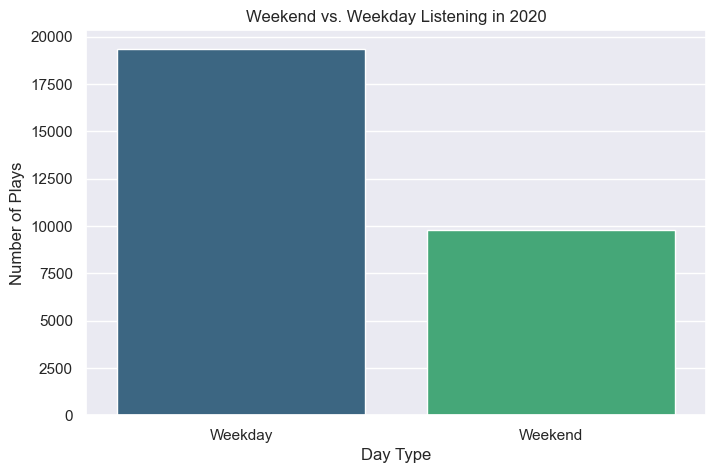

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df_weekend_vs_weekday["day_type"], y=df_weekend_vs_weekday["play_count"], palette="viridis")
plt.xlabel("Day Type")
plt.ylabel("Number of Plays")
plt.title("Weekend vs. Weekday Listening in 2020")
plt.show()

---

# **Monthly Listening Trends**

In [29]:
query_monthly_trends = """
SELECT TO_CHAR(ts, 'YYYY-MM') AS month, COUNT(*) AS play_count
FROM spotify_history_2020
GROUP BY month
ORDER BY month;
"""

In [30]:
df_monthly_trends = pd.read_sql(query_monthly_trends, engine)

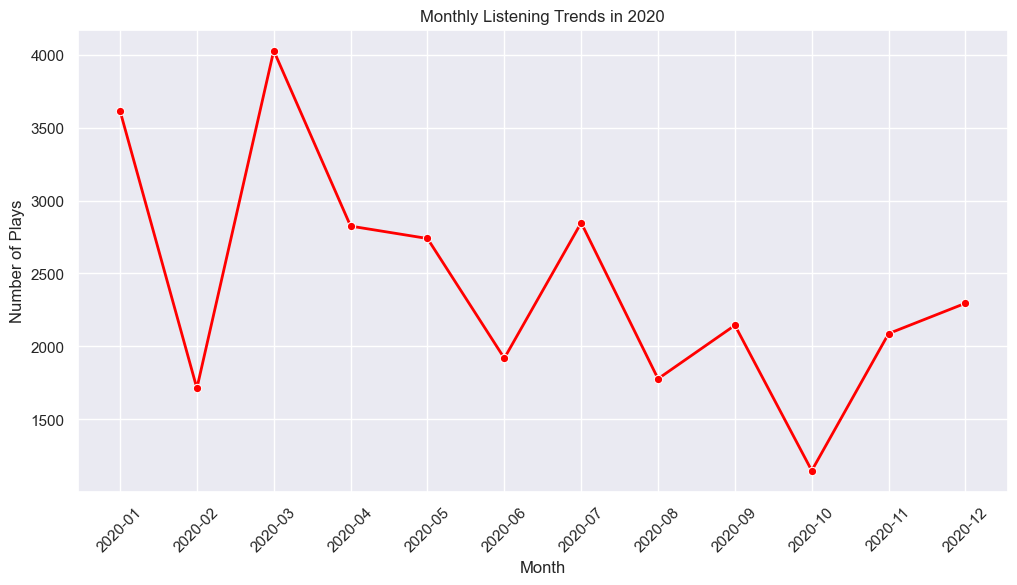

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_monthly_trends["month"], y=df_monthly_trends["play_count"], marker="o", linewidth=2, color="red")
plt.xlabel("Month")
plt.ylabel("Number of Plays")
plt.title("Monthly Listening Trends in 2020")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

---

# **My Spotify Top Songs 2020**

In [32]:
query_top_100 = """
SELECT master_metadata_track_name AS track, 
       master_metadata_album_artist_name AS artist, 
       COUNT(*) AS play_count
FROM spotify_history_2020
GROUP BY track, artist
ORDER BY play_count DESC
LIMIT 100;
"""

In [33]:
df_top_100 = pd.read_sql(query_top_100, engine)

In [34]:
# Save to CSV
df_top_100.to_csv("../top_100s/csv/my_top_100_songs_2020.csv", index=False)

C:\Users\kcalo\AppData\Local\Temp\ipykernel_40780\2616130065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top_100["play_count"][:20], y=df_top_100["track"][:20], palette="mako")


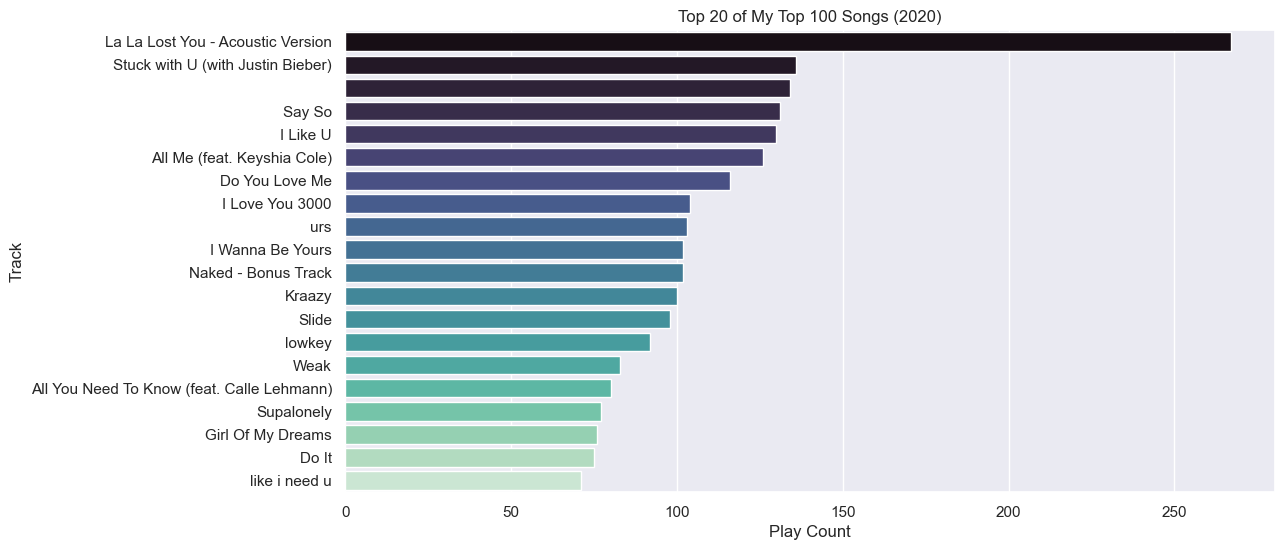

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_100["play_count"][:20], y=df_top_100["track"][:20], palette="mako")
plt.xlabel("Play Count")
plt.ylabel("Track")
plt.title("Top 20 of My Top 100 Songs (2020)")
plt.show()

In [36]:
# Close engine connection here
engine.dispose()